<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [48]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<ipython-input-25-19843b133a1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='MEDV', data=boston_df, palette="Blues")


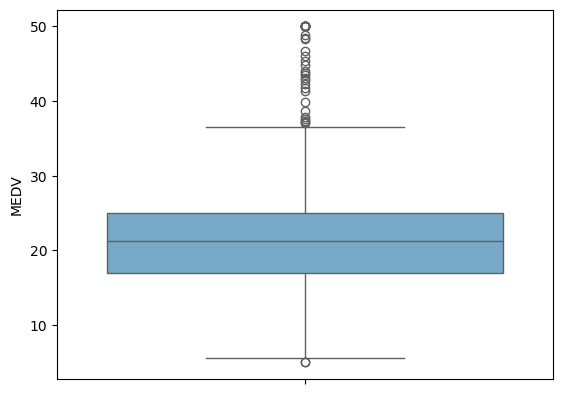

In [25]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y='MEDV', data=boston_df, palette="Blues")


<ipython-input-26-fbe012958991>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(boston_df['CHAS'].value_counts(), palette="Blues")


<AxesSubplot:ylabel='CHAS'>

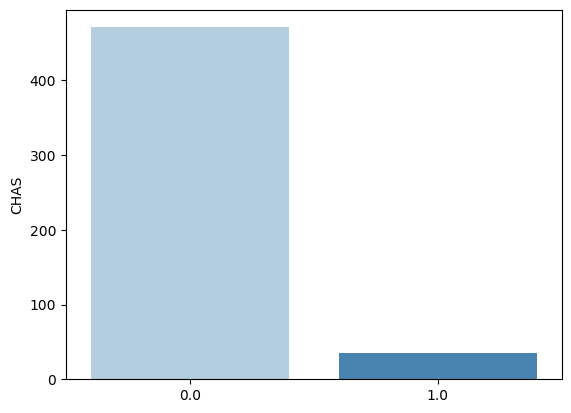

In [26]:
# Provide a  bar plot for the Charles river variable
sns.barplot(boston_df['CHAS'].value_counts(), palette="Blues")


<ipython-input-36-cf201b30301d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette="Blues")


<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

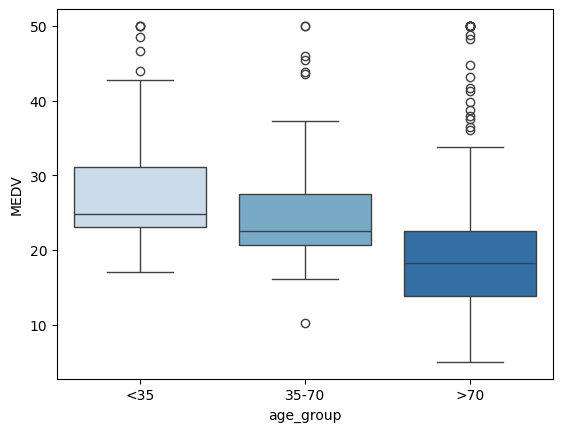

In [36]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')],
                           labels=['<35', '35-70', '>70'],
                           right=False)
sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette="Blues")

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

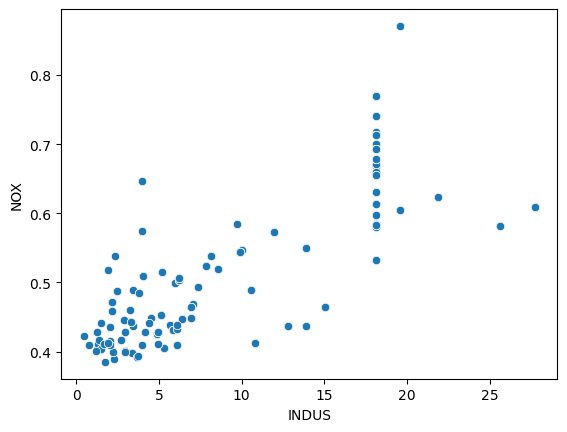

In [38]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# there is a trend for positive correlation between these two variables

Text(0, 0.5, 'count')

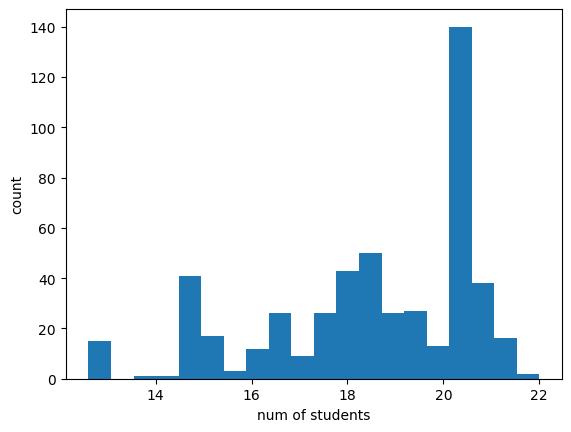

In [46]:
# Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'], bins=20)
plt.xlabel('num of students')
plt.ylabel('count')

For each of the following questions;




Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [50]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# H0 - the difference is NOT significant; H1 - the difference is significant; alpha = 0.05
medv_chas = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_chas = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(medv_chas, medv_no_chas)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print('There is a significant difference in median value of houses bounded by the Charles river.')

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in median value of houses bounded by the Charles river.


In [53]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# H0 - there is NO difference; H1 - there is a difference; alpha = 0.05

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>70'

older = boston_df[boston_df['age_group'] == '<35']['MEDV']
middle = boston_df[boston_df['age_group'] == '35-70']['MEDV']
older = boston_df[boston_df['age_group'] == '>70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(older, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

if p_value < 0.05:
    print('There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')

F_Statistic: 16.766687019847538, P-Value: 7.719534132795561e-08
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


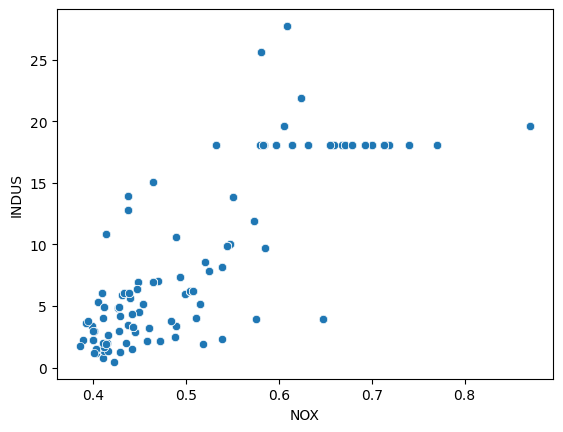

In [58]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# H0 - there is NO relationship; H1 - there is a relationship; alpha = 0.05

sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
print(scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']))

if p_value < 0.05:
    print('There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')

In [ ]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# H0 - there is NO impact; H1 - there is an impact; alpha = 0.05

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

print('Conclusion: There is a significant positive correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes: MEDV increases as DIS increases')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        18:12:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0